In [70]:
from PIL import Image
import numpy as np
import pandas as pd


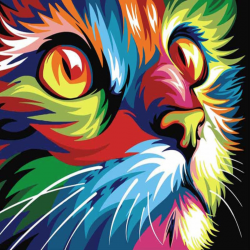

In [135]:
image = Image.open('cat.png')
image

In [136]:
pix_val = np.asarray(image)

r_mean , r_std = np.mean(pix_val[:,0]), np.std(pix_val[:,0])
g_mean , g_std = np.mean(pix_val[:,1]), np.std(pix_val[:,1])
b_mean , b_std = np.mean(pix_val[:,2]), np.std(pix_val[:,2])                                                                                          
w , h = image.size
idx=[]
f_space=[]
x = np.arange(0,w,1)
y = np.arange(0,h, 1)
for i in range(0,h):
    for j in range(0,w):
        f_space.append((pix_val[i][j][0],pix_val[i][j][1],pix_val[i][j][2] , i ,j ))



f_space= np.asarray(f_space)
f = np.zeros((f_space.shape))
feature_nn = f_space
f[:,0] = (f_space[:,0] - np.mean(f_space[:,0]))/ np.std(f_space[:,0])
f[:,1] = (f_space[:,1]- np.mean(f_space[:,1]))/ np.std(f_space[:,1])
f[:,2] = (f_space[:,2] - np.mean(f_space[:,2]))/ np.std(f_space[:,2])
f[:,3]  = (f_space[:,3] - np.mean(f_space[:,3]))/ np.std(f_space[:,3])
f[:,4] = ( f_space[:,4] - np.mean(f_space[:,4]))/ np.std(f_space[:,4])

f


array([[-0.89521374, -0.9638892 , -0.48770593, -1.72513641, -1.72513641],
       [-0.8617487 , -0.86257527, -0.25065992, -1.72513641, -1.71127989],
       [-1.0067639 , -0.78658982, -0.13910886, -1.72513641, -1.69742337],
       ...,
       [-1.11831406, -1.21717403, -1.21278784,  1.72513641,  1.69742337],
       [-1.12946907, -1.22983827, -1.22673172,  1.72513641,  1.71127989],
       [-1.14062409, -1.24250251, -1.24067561,  1.72513641,  1.72513641]])

In [137]:
# class
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, feature):
         # pass an numpy array into fit
        x,y =feature.shape
        self.centroid = {}
         # assign centroids
        for i in range(0, self.k):
            
            rnd = np.random.randint(0,x)
            self.centroid[i] = feature[rnd] # random initialzation for center
        
      
            
# ## iterate over whole data point to make error 0 for centroid distance.
        for i  in range(0,self.max_iter):
            self.cls = {}
            for i in range(self.k):
                self.cls[i] = [] # 3 clusters inittialized
        
            for points in feature:
                centre_move = []
                for c in self.centroid:
                    x = np.linalg.norm(points - self.centroid[c])
                    centre_move.append(x)
                 
                idx = min(centre_move)
                class_idx = centre_move.index(idx)
                self.cls[class_idx].append(points)
                
                 # once we know which cluster data point belongs to 
                 # add to the class where each idx has a list
            prev_centroid = dict(self.centroid)
 #             print(type(prev_centroid))
            
             # now form the new centroids
            
            for idx in self.cls:
                self.centroid[idx] = np.average(self.cls[idx], axis = 0)
              
            flag = True 
             # now check for the movement of each centroid within tol
            for no in self.centroid:
                sum_tol = np.sum((self.centroid[no]-prev_centroid[no])/prev_centroid[no]*100.0)
 #                 print(sum_tol)
                if  sum_tol > self.tol :
                     flag = False
                     continue 
            if flag ==True : 
                self.final_centroids = self.centroid
 #                 print('done')
                break
                
                
            

    def predict(self,point):
#         # predcit which cluster each data point belongs to 
 # #         print(np.asarray(self.centroid).shape)
        
#          for x in self.centroid:
#                  # calculation of euclidean distance 
# # #                 # do we include distances ?
#              c.append([np.linalg.norm(data - self.final_centroids[x])])
        
# #         print(len(c))
#          class_idx = np.argmin(np.asarray(c))
                 # once we know which cluster data point belongs to 
#                 # add to the class where each idx has a list
        
         c = [np.linalg.norm(point-self.final_centroids[idx]) for idx in self.centroid]
# #         class_idx = 
         class_idx = c.index(min(c))
         return class_idx
    



In [173]:
# reconstruction of the image

img_seg = K_Means(k= 10)
img_seg.fit(f)



In [174]:
im_cls=[]
mod_im =[]
idx= 0 
for data in f:
    im_cls =img_seg.predict(data)
    r,g,b = img_seg.final_centroids[im_cls][:3]
    data[:3] = r,g,b
    mod_im.append(data)
    
mod_im = np.asarray(mod_im)
mod_im

array([[-0.41210986, -0.59906038, -0.47018755, -1.72513641, -1.72513641],
       [-0.41210986, -0.59906038, -0.47018755, -1.72513641, -1.71127989],
       [-0.41210986, -0.59906038, -0.47018755, -1.72513641, -1.69742337],
       ...,
       [-0.51872524, -0.81061548, -0.72006041,  1.72513641,  1.69742337],
       [-0.51872524, -0.81061548, -0.72006041,  1.72513641,  1.71127989],
       [-0.51872524, -0.81061548, -0.72006041,  1.72513641,  1.72513641]])

In [175]:
data = pd.DataFrame(mod_im, columns = ['r_cp', 'g_cp', 'b_cp','i','j'])
#  Inverting the normalization of the image
data['r_cp'] = (data['r_cp'] * np.std(f_space[:,0]) ) + np.mean(f_space[:,0])
data['g_cp'] = (data['g_cp'] * np.std(f_space[:,1]) )+ np.mean(f_space[:,1])
data['b_cp'] = (data['b_cp'] * np.std(f_space[:,2]) )+  np.mean(f_space[:,2])
data['i'] = feature_nn[:,-2]
data['j'] = feature_nn[:,-1]
# data['i'] = data['i'].astype(int)
# data['j'] = data['j'].astype(int)
type(data)

pandas.core.frame.DataFrame

In [176]:
w , h = image.size
x = np.asarray(image)
segmented_image = np.zeros((x.shape))
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        a = data[(data['i'] == i) & (data['j'] == j)]['r_cp']
        b = data[(data['i'] == i) & (data['j'] == j)]['g_cp']
        c = data[(data['i'] == i) & (data['j'] == j)]['b_cp']
        segmented_image[i, j,0] = a
        segmented_image[i, j,1] = b
        segmented_image[i, j,2] = c

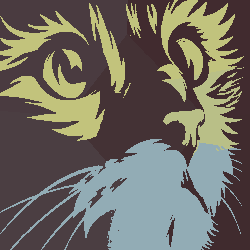

In [177]:
import matplotlib.pyplot as plt

im = Image.fromarray(np.uint8(segmented_image[:,:,:-1]))
im

# im.save("cat-seg(k-12).jpeg")



In [7]:
# class K_Means:
#     """
#     Class for operations of K-Means algorithm with fit and predict as member functions.
#     """
#     def __init__(self, K=3, tol= 0.001, max_iter=500):
#         self.K = K
#         self.tol = tol
#         self.max_iter = max_iter
#         self.final_centroids = {}
#     def fit(self,data):
#         self.centroids = {}
        
#         for k in range(self.K):
#             # Initialising RGB values for centroids
#             num =  np.random.randint(0,data.shape[0]+1)
#             self.centroids[k] = data[num]
            
#         for i in range(self.max_iter):
#             self.classifications = {}
#             for i in range(self.K):
#                 self.classifications[i] = []
            
#             for featureset in data:
#                 distances = []
#                 for center in self.centroids:
#                     x = np.linalg.norm(featureset - self.centroids[center])
#                     distances.append(x)
#                 classification = distances.index(min(distances))
#                 self.classifications[classification].append(featureset)

#             prev_centroids = dict(self.centroids)

#             for classification in self.classifications:
#                 self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                
#             optimized = True

#             for c in self.centroids:
#                 original_centroid = prev_centroids[c]
#                 current_centroid = self.centroids[c]
#                 if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
#                     optimized = False

#             if optimized:
#                 self.final_centroids = self.centroids
#                 break
   
#     def predict(self,data):
#         distances = [np.linalg.norm(data-self.final_centroids[centroid]) for centroid in self.centroids]
#         classification = distances.index(min(distances))
#         return classification